### 1. Intro

### 2. Librares & Configuration

2.1 Import Libraries

In [12]:
"""Import basic modules"""
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats                         # For statistics
from scipy.stats.contingency import association # upgrade scipy to use this to calculate Cramer's V

"""Plotly visualization"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
  

"""scikit-learn modules"""
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer # convert to Gaussian-like data
from sklearn.feature_selection import chi2
from sklearn.metrics import matthews_corrcoef

import multiprocessing
import pickle, joblib


from IPython.display import Markdown, display

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))


sns.set_style('whitegrid')

init_notebook_mode(connected=True) # to display plotly graph offline

%matplotlib inline

In [13]:
# customize as needed
plt_params = {
    # 'figure.facecolor': 'white',
    'axes.facecolor' : 'white',

    ## to set size 
    # 'legend.fontsize': 'x-large',
    # 'figure.figsize': (15, 10),
    # 'axes.labelsize': 'x-large',
    # 'axes.titlesize': 'x-large',
    # 'xtick.labelsize': 'x-large',
    # 'ytick.labelsize': 'x-large'
}

plt.rcParams.update(plt_params)

2.2 Configuration

In [14]:
# padding value to print left padded string
left_padding = 21

# seed value
SEED = 42

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

### 3. Descriptive Analysis

In [16]:
# Data
data = {
    'Feature Name': ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
                     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'streamingTV', 'streamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                     'MonthlyCharges', 'TotalCharges', 'Churn'],
    'Description': ['Contains customer ID', 'whether the customer female or male', 'Whether the customer is a senior citizen or not (1, 0)',
                    'Whether the customer has a partner or not (Yes, No)', 'Whether the customer has dependents or not (Yes, No)',
                    'Number of months the customer has stayed with the company', 'Whether the customer has a phone service or not (Yes, No)',
                    'Whether the customer has multiple lines r not (Yes, No, No phone service)', 'Customer’s internet service provider (DSL, Fiber optic, No)',
                    'Whether the customer has online security or not (Yes, No, No internet service)', 'Whether the customer has online backup or not (Yes, No, No internet service)',
                    'Whether the customer has device protection or not (Yes, No, No internet service)', 'Whether the customer has tech support or not (Yes, No, No internet service)',
                    'Whether the customer has streaming TV or not (Yes, No, No internet service)', 'Whether the customer has streaming movies or not (Yes, No, No internet service)',
                    'The contract term of the customer (Month-to-month, One year, Two year)', 'Whether the customer has paperless billing or not (Yes, No)',
                    'The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)', 'The amount charged to the customer monthly',
                    'The total amount charged to the customer', 'Whether the customer churned or not (Yes or No)'],
    'Data Type': ['categorical', 'categorical', 'numeric, int', 'categorical', 'categorical', 'numeric, int', 'categorical',
                  'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical', 'categorical',
                  'categorical', 'categorical', 'categorical', 'categorical', 'numeric, int', 'object', 'categorical']
}

# Create DataFrame
df = pd.DataFrame(data)

# Set options to display the entire DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Print the DataFrame as a table
print(df.to_string(index=False))

    Feature Name                                                                                Description    Data Type
      customerID                                                                       Contains customer ID  categorical
          gender                                                        whether the customer female or male  categorical
   SeniorCitizen                                     Whether the customer is a senior citizen or not (1, 0) numeric, int
         Partner                                        Whether the customer has a partner or not (Yes, No)  categorical
      Dependents                                       Whether the customer has dependents or not (Yes, No)  categorical
          tenure                                  Number of months the customer has stayed with the company numeric, int
    PhoneService                                  Whether the customer has a phone service or not (Yes, No)  categorical
   MultipleLines                

In [17]:
df_churn = pd.read_csv("Telco-Customer-Churn.csv")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
printmd(f"Dataset Dimension: **{df_churn.shape[0]}** rows,  **{df_churn.shape[1]}** columns")

Dataset Dimension: **7043** rows,  **21** columns

In [19]:
df_churn.info()

printmd("<br>**SeniorCitizen** is already in integer form<br><br>**TotalCharges** should be converted to float")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<br>**SeniorCitizen** is already in integer form<br><br>**TotalCharges** should be converted to float

3.1 cek duplikat

In [20]:
print('Known observations: {}\nUnique observations: {}'.format(len(df_churn.index),len(df_churn.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 7043
Unique observations: 7043


**No duplicates Found!**

In [21]:
del df_churn["customerID"]

3.2 Summary of Categorical Features

In [22]:
df_churn.describe(include=['object']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


3.3 Unique Values

In [23]:
printmd("**Unique Values By Features**")
for feature in df_churn.columns:
    uniq = np.unique(df_churn[feature])
    print(feature.ljust(left_padding),len(uniq))

**Unique Values By Features**

gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure                73
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges        1585
TotalCharges          6531
Churn                 2


### 4. Data Wrangling

4.1 Missing Value

In [24]:
df_churn.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
cat_cols = set(df_churn.columns) - set(df_churn._get_numeric_data().columns)

printmd("'**isna**' is only applicable for numerical data type<br>")
printmd("Checking missing values for object data type<br><br>")

for cat in cat_cols:
    print(cat.ljust(left_padding), df_churn[cat].apply(lambda x:len(x.strip()) == 0 or x.strip().lower() == 'nan').sum())

printmd("<br>TotalCharges is an object datatype, it has **11** 'nan' value")

'**isna**' is only applicable for numerical data type<br>

Checking missing values for object data type<br><br>

DeviceProtection      0
OnlineSecurity        0
PaperlessBilling      0
Churn                 0
StreamingTV           0
Contract              0
InternetService       0
PaymentMethod         0
TechSupport           0
StreamingMovies       0
gender                0
TotalCharges          11
PhoneService          0
Partner               0
OnlineBackup          0
MultipleLines         0
Dependents            0


<br>TotalCharges is an object datatype, it has **11** 'nan' value

4.1.1 Change Data Type

In [26]:
df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors = 'coerce')

4.1.2 Imputation

In [27]:
indices_null_tc = df_churn[df_churn["TotalCharges"].isna()].index

In [28]:
display(df_churn.iloc[indices_null_tc])

printmd("<br>**'Tenure' (months stayed at the company) is correlated with 'TotalCharges' column**")
printmd("**when 'Tenure' is 0 , 'TotalCharges' is 0 too**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<br>**'Tenure' (months stayed at the company) is correlated with 'TotalCharges' column**

**when 'Tenure' is 0 , 'TotalCharges' is 0 too**

In [29]:
display(df_churn[df_churn.tenure == 1].head(2))

printmd("<br>**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**")


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


<br>**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**

In [30]:
display(df_churn[df_churn.tenure == 3].head(2))

printmd("<br>**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**")
printmd("<br>From the above observation we can conclude that, **'TotalCharges'  = 'MonthlyCharges' x 'Tenure' + Extra Cost**")
printmd("**Therefore, imputing missing values on 'TotalCharges' column with 0**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
65,Female,0,No,No,3,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.3,244.1,No
74,Female,0,No,Yes,3,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.5,177.4,No


<br>**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**

<br>From the above observation we can conclude that, **'TotalCharges'  = 'MonthlyCharges' x 'Tenure' + Extra Cost**

**Therefore, imputing missing values on 'TotalCharges' column with 0**

In [31]:
df_churn['TotalCharges'].fillna(0, inplace=True)

In [32]:
df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


4.2 Binning

In [33]:
def binning_feature(feature):
    plt.hist(df_churn[feature])

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

    bins = np.linspace(min(df_churn[feature]), max(df_churn[feature]), 4)
    
    printmd("**Value Range**")
    
    printmd(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
    printmd(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
    printmd(f"High ({bins[2]: .2f} - {bins[3]: .2f})")

    group_names = ['Low', 'Medium', 'High']

    df_churn.insert(df_churn.shape[1]-1,f'{feature}-binned', pd.cut(df_churn[feature], bins, labels=group_names, include_lowest=True))
    display(df_churn[[feature, f'{feature}-binned']].head(10))


    # count values
    printmd("<br>**Binning Distribution**<br>")
    display(df_churn[f'{feature}-binned'].value_counts())


    # plot the distribution of each bin
    plt.bar(group_names, df_churn[f'{feature}-binned'].value_counts())
    # px.bar(data_canada, x='year', y='pop')

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

4.2.1 Tenure

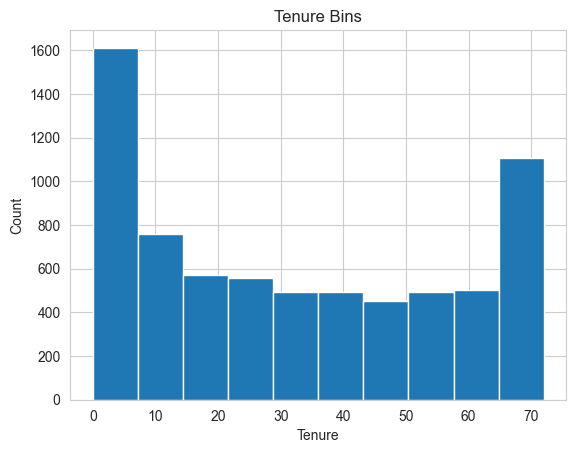

**Value Range**

Low ( 0.00 -  24.00)

Medium ( 24.00 -  48.00)

High ( 48.00 -  72.00)

,tenure,tenure-binned
0,1,Low
1,34,Medium
2,2,Low
3,45,Medium
4,2,Low
5,8,Low
6,22,Low
7,10,Low
8,28,Medium
9,62,High


<br>**Binning Distribution**<br>

tenure-binned
Low       3210
High      2239
Medium    1594
Name: count, dtype: int64

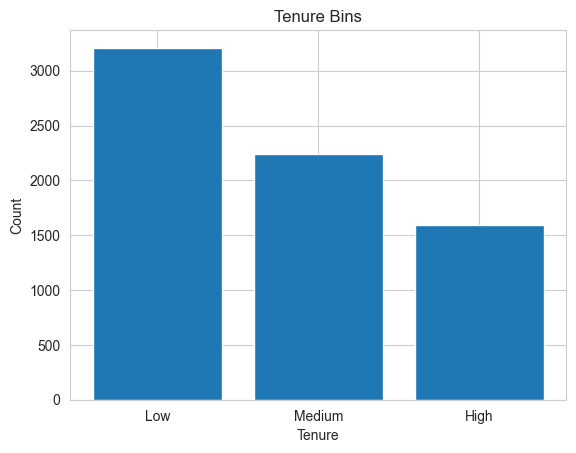

In [34]:
binning_feature('tenure')

4.2.2 MontlyChages

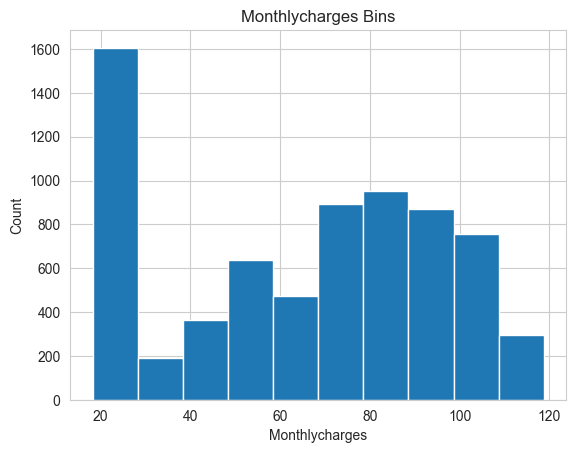

**Value Range**

Low ( 18.25 -  51.75)

Medium ( 51.75 -  85.25)

High ( 85.25 -  118.75)

,MonthlyCharges,MonthlyCharges-binned
0,29.85,Low
1,56.95,Medium
2,53.85,Medium
3,42.30,Low
4,70.70,Medium
5,99.65,High
6,89.10,High
7,29.75,Low
8,104.80,High
9,56.15,Medium


<br>**Binning Distribution**<br>

MonthlyCharges-binned
Low       2451
Medium    2439
High      2153
Name: count, dtype: int64

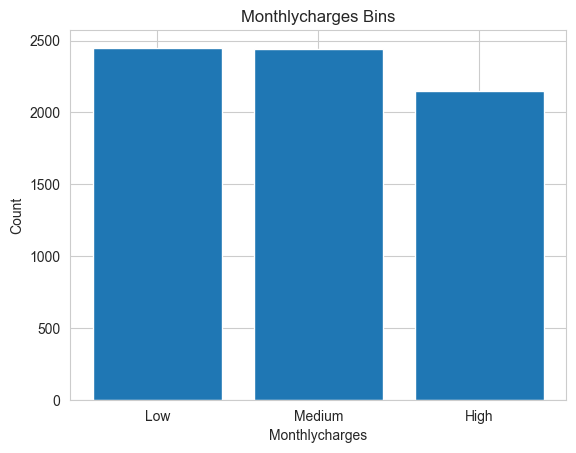

In [35]:
binning_feature('MonthlyCharges')

4.2.3 TotalChanges

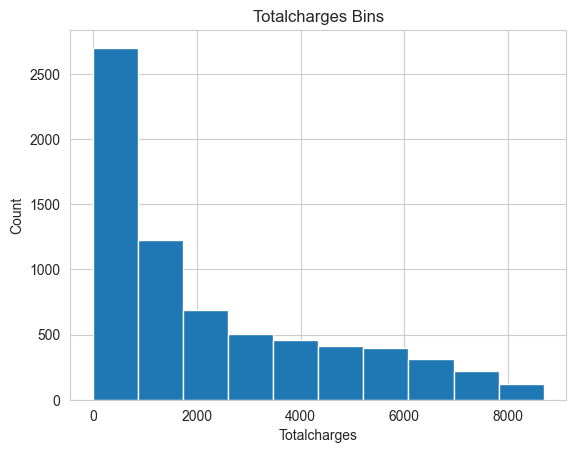

**Value Range**

Low ( 0.00 -  2894.93)

Medium ( 2894.93 -  5789.87)

High ( 5789.87 -  8684.80)

,TotalCharges,TotalCharges-binned
0,29.85,Low
1,1889.50,Low
2,108.15,Low
3,1840.75,Low
4,151.65,Low
5,820.50,Low
6,1949.40,Low
7,301.90,Low
8,3046.05,Medium
9,3487.95,Medium


<br>**Binning Distribution**<br>

TotalCharges-binned
Low       4782
Medium    1474
High       787
Name: count, dtype: int64

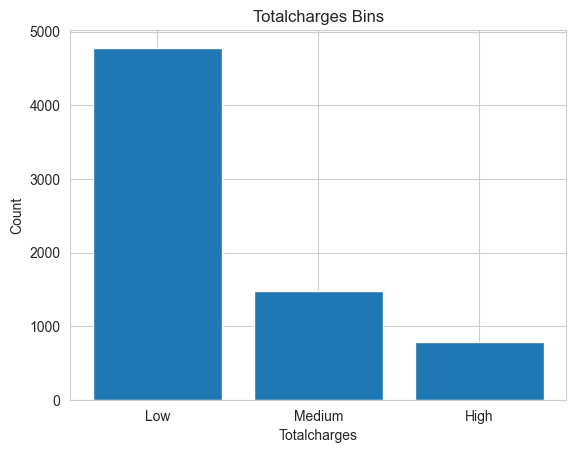

In [36]:
binning_feature('TotalCharges')

In [37]:
printmd("**Data Types**<br>")
df_churn.dtypes.value_counts()

**Data Types**<br>

object      16
category     3
int64        2
float64      2
Name: count, dtype: int64

### 5. Univariate Analysis

5.1 Statistical Normality Test

5.1.1 D’Agostino’s K^2 Test

MOntylyChanger

In [38]:
stat, p = stats.normaltest(df_churn['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=11419.52879, p=0.000
Sample does not look Gaussian (reject H0)


Tenure

In [39]:
stat, p = stats.normaltest(df_churn['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=76258.50517, p=0.000
Sample does not look Gaussian (reject H0)


5.1.2 Anderson-Darling Test

TotalChanges

In [40]:
result = stats.anderson(df_churn['TotalCharges'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: 346.638
Significance level 15.00 % : critical value 0.576, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.656, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.787, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


In [41]:
df_churn.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Low,Low,Low,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Medium,Medium,Low,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Low,Medium,Low,Yes


### Bivariate Analysis

6.1 List Feature Based on Types

In [43]:
# Check cardinality of categorical variables 
target_col_filter = df_churn.loc[:, df_churn.columns != 'Churn']


cat_cols = list(set(target_col_filter.columns) - set(target_col_filter._get_numeric_data().columns))
num_cols = list(set(target_col_filter._get_numeric_data().columns) - set({'SeniorCitizen'})) # already converted to integer


# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: target_col_filter[col].nunique(), cat_cols))
dict_features_by_col = dict(zip(cat_cols, object_nunique))


# Print number of unique entries by column, in ascending order
print(sorted(dict_features_by_col.items(), key=lambda x: x[1]))


ordinal_cols = ['tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned']
dichotomous_cols = [cat for cat in cat_cols if df_churn[cat].value_counts().count() == 2]
polytomous_cols = list(set(cat_cols) - set(dichotomous_cols) - set(ordinal_cols))


print("Categorical Columns".ljust(left_padding), cat_cols)

print("Numerical Columns".ljust(left_padding), num_cols)

print("Ordinal Columns".ljust(left_padding), ordinal_cols)

print("Dichotomous Columns".ljust(left_padding), dichotomous_cols)

print("Polytomous Columns".ljust(left_padding), polytomous_cols)

[('PaperlessBilling', 2), ('gender', 2), ('PhoneService', 2), ('Partner', 2), ('Dependents', 2), ('tenure-binned', 3), ('DeviceProtection', 3), ('OnlineSecurity', 3), ('StreamingTV', 3), ('Contract', 3), ('InternetService', 3), ('TechSupport', 3), ('StreamingMovies', 3), ('TotalCharges-binned', 3), ('MonthlyCharges-binned', 3), ('OnlineBackup', 3), ('MultipleLines', 3), ('PaymentMethod', 4)]
Categorical Columns   ['tenure-binned', 'DeviceProtection', 'OnlineSecurity', 'PaperlessBilling', 'StreamingTV', 'Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'StreamingMovies', 'gender', 'TotalCharges-binned', 'MonthlyCharges-binned', 'PhoneService', 'Partner', 'OnlineBackup', 'MultipleLines', 'Dependents']
Numerical Columns     ['MonthlyCharges', 'tenure', 'TotalCharges']
Ordinal Columns       ['tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned']
Dichotomous Columns   ['PaperlessBilling', 'gender', 'PhoneService', 'Partner', 'Dependents']
Polytomous Columns    ['Devic

6.2 Numerical & Numerical

In [44]:
def cal_spearmanr(c1, c2):

    alpha = 0.05

    correlation, p_value = stats.spearmanr(df_churn[c1], df_churn[c2])

    print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

    if p_value > alpha:
        print('Probably do not have monotonic relationship (fail to reject H0)')
    else:
        print('Probably have monotonic relationship (reject H0)')

In [45]:
cal_spearmanr('tenure','MonthlyCharges')

tenure, MonthlyCharges correlation : 0.27641678933130215, p : 1.0271266876409408e-123
Probably have monotonic relationship (reject H0)


In [46]:
cal_spearmanr('tenure','TotalCharges')

tenure, TotalCharges correlation : 0.8896957900597577, p : 0.0
Probably have monotonic relationship (reject H0)


In [47]:
cal_spearmanr('MonthlyCharges','TotalCharges')

MonthlyCharges, TotalCharges correlation : 0.638028390201301, p : 0.0
Probably have monotonic relationship (reject H0)


6.3 Numerical & Categorical

6.3.1 Kendall rank correlation coefficient

In [48]:
def kendall_rank_correlation(feature1, feature2):

    coef, p_value = stats.kendalltau(df_churn[feature1], df_churn[feature2])
    print(f"Correlation between {feature1} and {feature2} ")
    print('Kendall correlation coefficient = %.5f, p = %.5f' % (coef, p_value))

    # interpret the significance
    alpha = 0.05
    if p_value > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p_value)
    print('----\n')

In [49]:
ordinal_features = ['tenure-binned','MonthlyCharges-binned', 'TotalCharges-binned']

for ord in ordinal_features:
    printmd(f"Correlation with **{ord}**")
    kendall_rank_correlation('tenure',ord)
    kendall_rank_correlation('MonthlyCharges',ord)
    kendall_rank_correlation('TotalCharges',ord)

Correlation with **tenure-binned**

Correlation between tenure and tenure-binned 
Kendall correlation coefficient = -0.28746, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and tenure-binned 
Kendall correlation coefficient = -0.10710, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between TotalCharges and tenure-binned 
Kendall correlation coefficient = -0.23680, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



Correlation with **MonthlyCharges-binned**

Correlation between tenure and MonthlyCharges-binned 
Kendall correlation coefficient = -0.16485, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and MonthlyCharges-binned 
Kendall correlation coefficient = -0.22506, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between TotalCharges and MonthlyCharges-binned 
Kendall correlation coefficient = -0.20858, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



Correlation with **TotalCharges-binned**

Correlation between tenure and TotalCharges-binned 
Kendall correlation coefficient = 0.07424, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and TotalCharges-binned 
Kendall correlation coefficient = 0.00298, p = 0.75152
Samples are uncorrelated (fail to reject H0) p=0.752
----

Correlation between TotalCharges and TotalCharges-binned 
Kendall correlation coefficient = 0.12334, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



6.3.2 Mann-Whitney U Test

Correlation with Target (Dichotomous)

In [50]:
def mannwhitneyu_correlation(feature1):
    stat, p_value = stats.mannwhitneyu(df_churn[feature1], (df_churn['Churn'] == 'Yes').astype(int))
    print(f"Correlation between {feature1} and Churn")
    print('Statistics = %.5f, p = %.5f' % (stat, p_value))

    # interpret the significance
    alpha = 0.05
    if p_value > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
    print('----\n') 

In [51]:
numerical_features = ['tenure','MonthlyCharges', 'TotalCharges']

for num in numerical_features:
    printmd(f"Correlation with **{num}**")
    mannwhitneyu_correlation(num)

Correlation with **tenure**

Correlation between tenure and Churn
Statistics = 48981984.50000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **MonthlyCharges**

Correlation between MonthlyCharges and Churn
Statistics = 49603849.00000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **TotalCharges**

Correlation between TotalCharges and Churn
Statistics = 49554833.00000, p = 0.00000
Different distribution (reject H0)
----



In [52]:
# https://stackoverflow.com/questions/53624804/how-to-normalize-a-non-normal-distribution

data = df_churn['MonthlyCharges'].to_numpy()
pt = PowerTransformer(method='yeo-johnson') # ‘box-cox’, 'yeo-johnson'
data = data.reshape(-1, 1)
pt.fit(data)
transformed_data = pt.transform(data)

transformed_k2, transformed_p = stats.normaltest(transformed_data)

# other methods to transform into gaussian distribution

# log transform
# stats.normaltest(np.log(df_churn['MonthlyCharges']))

# square transform
# stats.normaltest(np.sqrt(df_churn['MonthlyCharges'])

# box-cox transform
# stats.normaltest(stats.boxcox(df_churn['MonthlyCharges'])[0])

# all other methods failed to convert into gaussian


alpha = 0.05
if transformed_p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


6.3.3 Polytomous(Nominal) with numeric

In [54]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [55]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['MonthlyCharges'])

0.40127388087245935

In [56]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['TotalCharges'])

0.35074070554475645

In [57]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['tenure'])

0.3998293691962001

6.4 Dichotomous & Dichotomous

6.4.1 Phi’s correlation

In [58]:
printmd("**Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
    print(col.ljust(left_padding), matthews_corrcoef(df_churn[col], df_churn['Churn']))

**Correlation Between Dichotomous Features with Target : Churn**

PaperlessBilling      0.1918253316664679
gender                0.0
PhoneService          0.01194198002900308
Partner               -0.15044754495917656
Dependents            -0.16422140157972528


6.5 Categorical & categorical

6.5.1 Chi-Square

In [59]:
# alpha/significance = 0.05
# If p-value <= alpha: significant result, reject null hypothesis (H0), dependent
# If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

def calculate_chi_square(feature1, feature2='Churn'):
    printmd(f"Correlation between **{feature1}** and **{feature2}**")
    crosstab = pd.crosstab(df_churn[feature1], df_churn[feature2])
    # display(crosstab)
    stat, p, dof, expected = stats.chi2_contingency(crosstab,correction=True)


    print(f'p-value : {p}, degree of freedom: {dof}')
    # print("expected frequencies :\n", expected)

    # interpret test-statistic
    prob = 0.95
    critical = stats.chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

    # interpret p-value
    alpha = 1.0 - prob

    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('-----------------------------------\n')

# credit : https://machinelearningmastery.com/chi-squared-test-for-machine-learning

Dichotomous Features

In [60]:
printmd("**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
    calculate_chi_square(col)

**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**

Correlation between **PaperlessBilling** and **Churn**

p-value : 4.073354668665985e-58, degree of freedom: 1
probability=0.950, critical=3.841, stat=258.278
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **gender** and **Churn**

p-value : 0.48657873605618596, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.484
Independent (fail to reject H0)
significance=0.050, p=0.487
Independent (fail to reject H0)
-----------------------------------



Correlation between **PhoneService** and **Churn**

p-value : 0.3387825358066928, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.915
Independent (fail to reject H0)
significance=0.050, p=0.339
Independent (fail to reject H0)
-----------------------------------



Correlation between **Partner** and **Churn**

p-value : 2.1399113440759935e-36, degree of freedom: 1
probability=0.950, critical=3.841, stat=158.733
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Dependents** and **Churn**

p-value : 4.9249216612154196e-43, degree of freedom: 1
probability=0.950, critical=3.841, stat=189.129
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Polytomous Features

In [61]:
printmd("**Chi-Squre Correlation Between Polytomous Features with Target : Churn**")

for col in polytomous_cols:
    calculate_chi_square(col)

**Chi-Squre Correlation Between Polytomous Features with Target : Churn**

Correlation between **DeviceProtection** and **Churn**

p-value : 5.505219496457244e-122, degree of freedom: 2
probability=0.950, critical=5.991, stat=558.419
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **OnlineSecurity** and **Churn**

p-value : 2.6611496351765517e-185, degree of freedom: 2
probability=0.950, critical=5.991, stat=849.999
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Contract** and **Churn**

p-value : 5.863038300673391e-258, degree of freedom: 2
probability=0.950, critical=5.991, stat=1184.597
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **StreamingTV** and **Churn**

p-value : 5.528994485739183e-82, degree of freedom: 2
probability=0.950, critical=5.991, stat=374.204
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **OnlineBackup** and **Churn**

p-value : 2.0797592160864276e-131, degree of freedom: 2
probability=0.950, critical=5.991, stat=601.813
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **InternetService** and **Churn**

p-value : 9.571788222840544e-160, degree of freedom: 2
probability=0.950, critical=5.991, stat=732.310
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **PaymentMethod** and **Churn**

p-value : 3.6823546520097993e-140, degree of freedom: 3
probability=0.950, critical=7.815, stat=648.142
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **TechSupport** and **Churn**

p-value : 1.4430840279998987e-180, degree of freedom: 2
probability=0.950, critical=5.991, stat=828.197
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **MultipleLines** and **Churn**

p-value : 0.0034643829548773, degree of freedom: 2
probability=0.950, critical=5.991, stat=11.330
Dependent (reject H0)
significance=0.050, p=0.003
Dependent (reject H0)
-----------------------------------



Correlation between **StreamingMovies** and **Churn**

p-value : 2.667756755723681e-82, degree of freedom: 2
probability=0.950, critical=5.991, stat=375.661
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



6.5.2 Cramér’s V

In [62]:
def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
      uses correction from Bergsma and Wicher,
      Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# credit : https://stackoverflow.com/a/46498792/11105356

In [63]:
printmd("**Correlation Between Polytomous Features with Target : Churn**")
cramer_v_val_dict = {}
for col in polytomous_cols:
    cramer_v_val_dict[col] = cramers_v(df_churn[col], df_churn['Churn'])

cramer_v_val_dict_sorted = sorted(cramer_v_val_dict.items(), key=lambda x:x[1], reverse=True)

for k,v in cramer_v_val_dict_sorted:
    print(k.ljust(left_padding), v)

printmd("<br>**Contract, OnlineSecurity, TechSupport, InternetService are moderately correlated with Churn**<br>")            

**Correlation Between Polytomous Features with Target : Churn**

Contract              0.40979839182553446
OnlineSecurity        0.34701606688272874
TechSupport           0.3425261587493695
InternetService       0.3220367323307425
PaymentMethod         0.3026771381187204
OnlineBackup          0.291850036724674
DeviceProtection      0.28109492388964397
StreamingMovies       0.23035147282444215
StreamingTV           0.22990176915403474
MultipleLines         0.03639958908232507


<br>**Contract, OnlineSecurity, TechSupport, InternetService are moderately correlated with Churn**<br>

Contract, OnlineSecurity, TechSupport, InternetService are moderately correlated with Churn

**Cramers V Heatmap on Polytomous Features and Target: Churn**

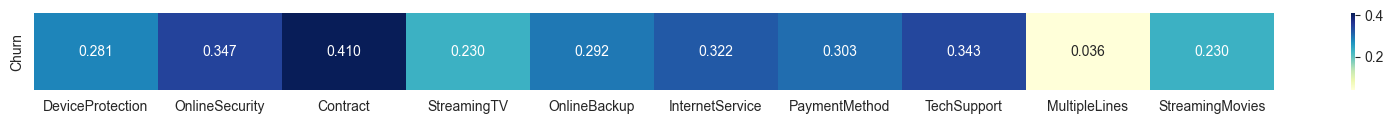

In [65]:
printmd("**Cramers V Heatmap on Polytomous Features and Target: Churn**")
cramers_v_val = pd.DataFrame(index=['Churn'], columns=polytomous_cols)
cramers_v_val = cramers_v_val.astype(float)  # Convert dtype to float

for j in range(0,len(polytomous_cols)):
    u = cramers_v(df_churn['Churn'], df_churn[polytomous_cols[j]])
    cramers_v_val.loc[:,polytomous_cols[j]] = u

cramers_v_val.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20, 1))
sns.heatmap(cramers_v_val, annot=True, fmt='.3f', cmap="YlGnBu")
plt.show()

Using Scipy Module

In [66]:
crosstab = pd.crosstab(df_churn['OnlineSecurity'], df_churn['Churn'])
display(crosstab)
printmd(f"Association between OnlineSecurity and Target:Churn **{stats.contingency.association(crosstab, method='cramer')}**")

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


Association between OnlineSecurity and Target:Churn **0.3474004326740552**

6.5.3 Uncertainty Coefficient

Unlike Cramer’s V, it is asymmetric

In [67]:
def conditional_entropy(x,y):
  # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = stats.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

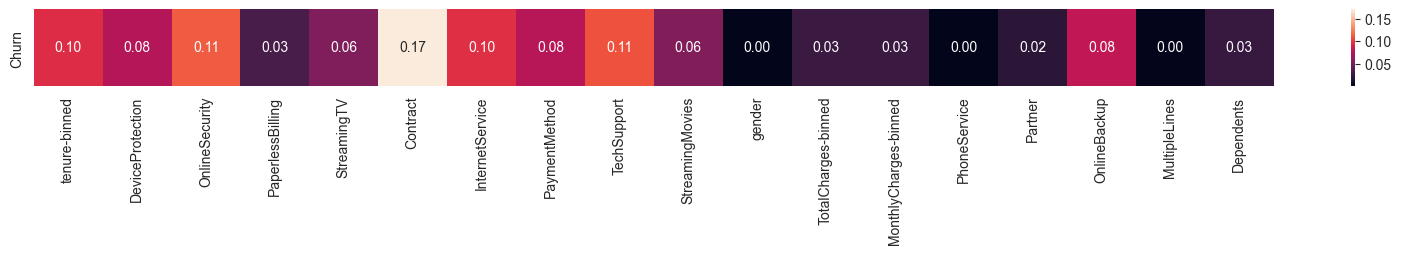

**Contract, OnlineSecurity, TechSupport, tenure-binned are moderately correlated with Churn**

In [69]:
theilu = pd.DataFrame(index=['Churn'], columns=cat_cols)
theilu = theilu.astype(float)  # Convert dtype to float

for j in range(0,len(cat_cols)):
    u = theil_u(df_churn['Churn'].tolist(),df_churn[cat_cols[j]].tolist())
    theilu.loc[:,cat_cols[j]] = u

theilu.fillna(value=np.nan,inplace=True)

plt.figure(figsize=(20, 1))
sns.heatmap(theilu, annot=True, fmt='.2f')
plt.show()

printmd("**Contract, OnlineSecurity, TechSupport, tenure-binned are moderately correlated with Churn**")   

6.6 Collinearity

6.6.1 Chi-Square

In [70]:
calculate_chi_square('PaymentMethod','MultipleLines')

Correlation between **PaymentMethod** and **MultipleLines**

p-value : 1.1367151062832025e-81, degree of freedom: 6
probability=0.950, critical=12.592, stat=392.514
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



In [71]:
calculate_chi_square('PaymentMethod','PhoneService')

Correlation between **PaymentMethod** and **PhoneService**

p-value : 0.8621473788722153, degree of freedom: 3
probability=0.950, critical=7.815, stat=0.747
Independent (fail to reject H0)
significance=0.050, p=0.862
Independent (fail to reject H0)
-----------------------------------



In [72]:
calculate_chi_square('PaymentMethod','Contract')


Correlation between **PaymentMethod** and **Contract**

p-value : 4.067638353787387e-213, degree of freedom: 6
probability=0.950, critical=12.592, stat=1001.582
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



### 7 Multivariate Analysis

7.1 Multicollinearity (Kruskal–Wallis)

In [73]:
# compare samples
stat, p = stats.kruskal(df_churn['TotalCharges'], df_churn['tenure'], df_churn['MonthlyCharges'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=13184.759, p=0.000
Different distributions (reject H0)


In [74]:
# compare samples
stat, p = stats.kruskal(df_churn['DeviceProtection'], df_churn['StreamingMovies'], df_churn['PhoneService'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=4696.340, p=0.000
Different distributions (reject H0)


In [75]:
# compare samples
stat, p = stats.kruskal(df_churn['Contract'], df_churn['PaymentMethod'], df_churn['PhoneService'], df_churn['InternetService'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=22407.812, p=0.000
Different distributions (reject H0)


7.2 Frequency Distribution

In [76]:
def multivariate_analysis(cat_var_1, cat_var_2, cat_var_3, target_variable=df_churn.Churn):
    
    fig,ax = plt.subplots(1,1,figsize = (18,5))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3],
                                        columns = target_variable, normalize = "index")*100                            
    cat_grouped_by_cat_target.rename({"Yes":"% Churn", "No":"% Not Churn"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

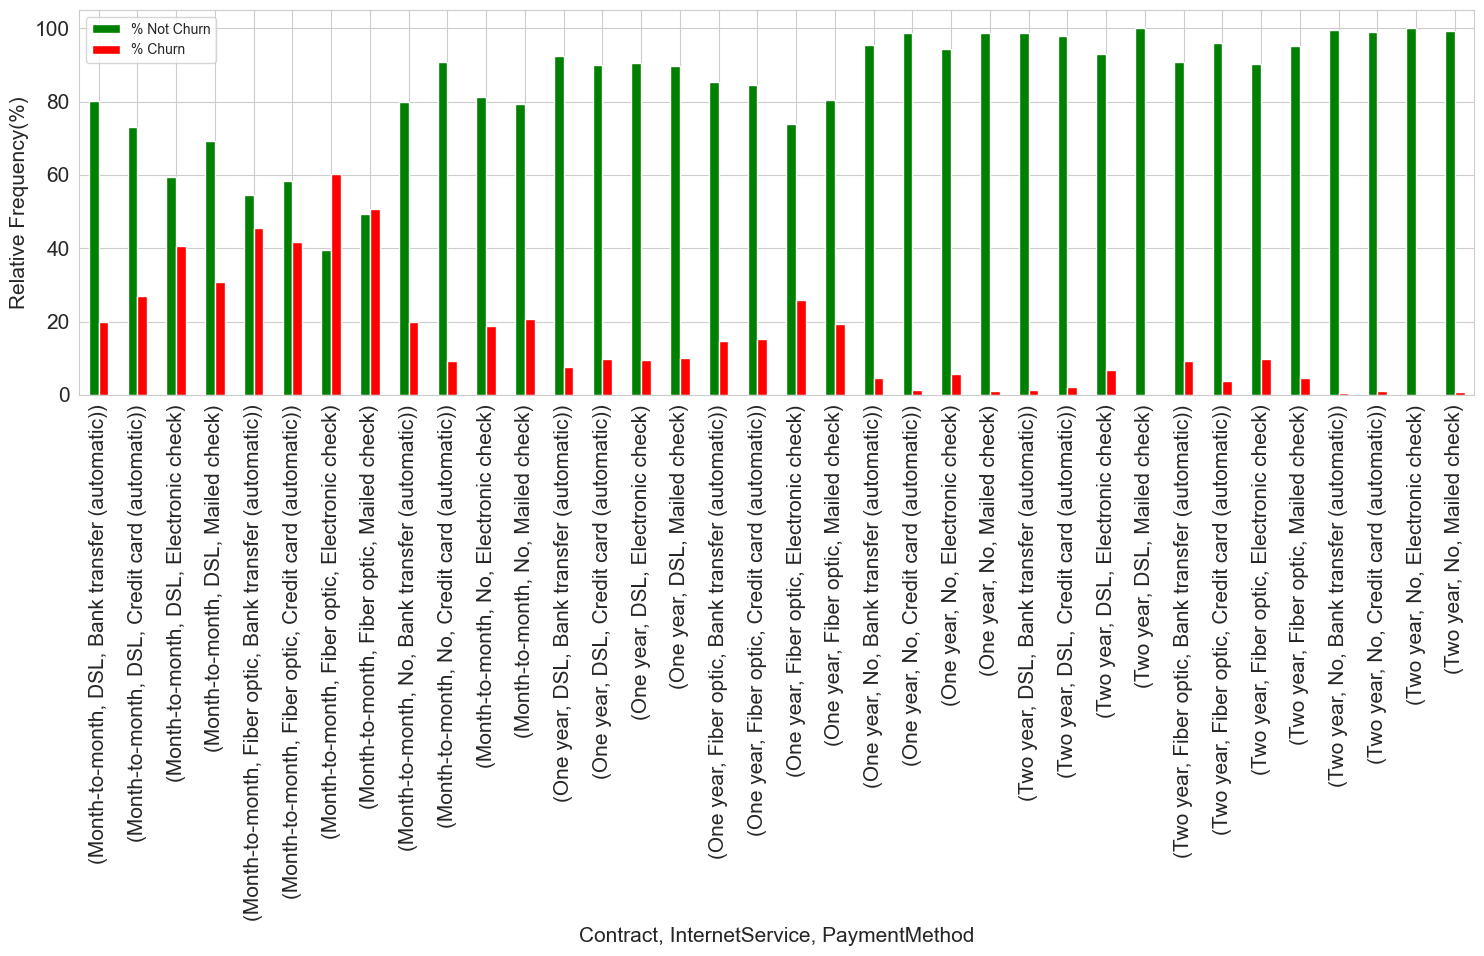

### Findings: Most of the users who churned had a Month-to-month contract and had internet service

In [77]:
multivariate_analysis(df_churn.Contract, df_churn.InternetService, df_churn.PaymentMethod)
printmd("### Findings: Most of the users who churned had a Month-to-month contract and had internet service")

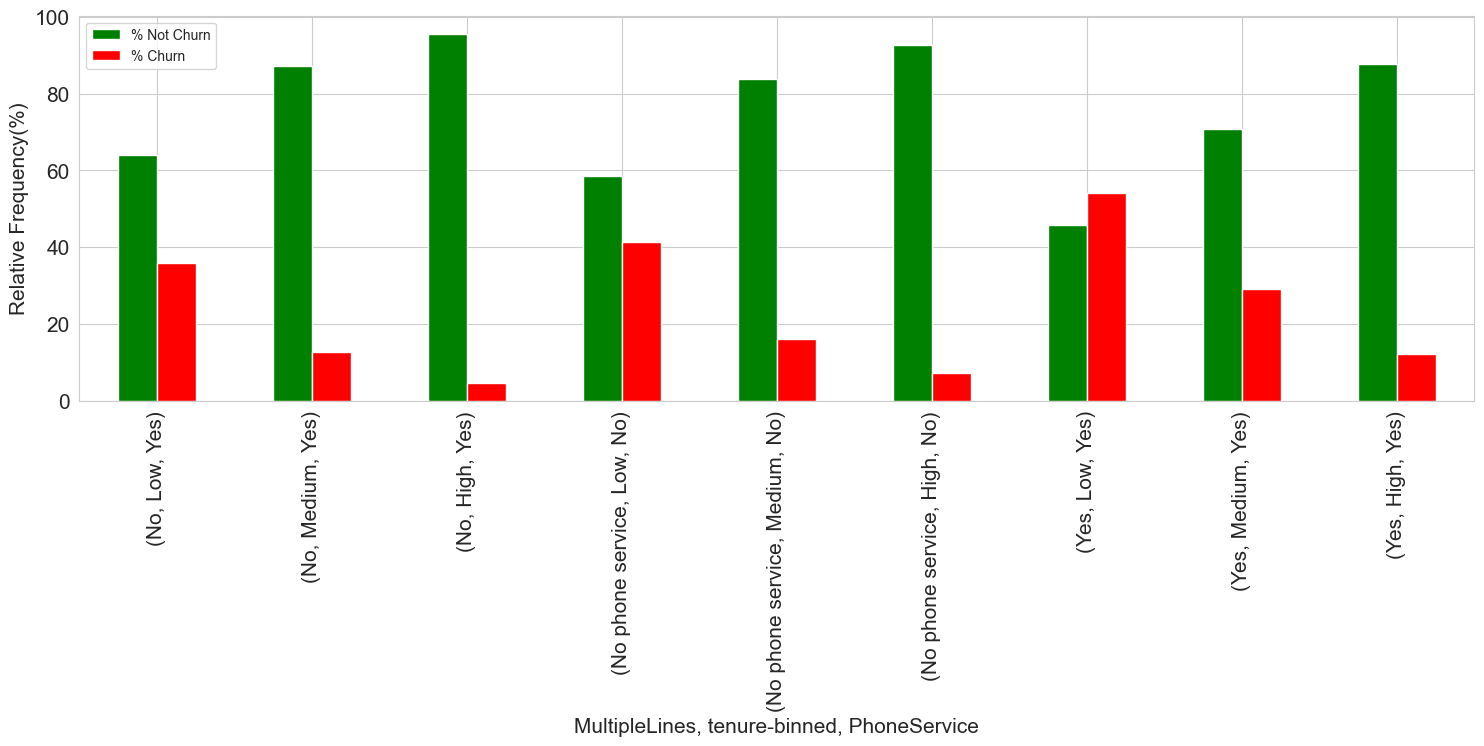

## Findings: Most of the users who churned had phone service

In [78]:
multivariate_analysis(df_churn.MultipleLines, df_churn['tenure-binned'], df_churn.PhoneService)
printmd("## Findings: Most of the users who churned had phone service")

7.3 Churn Count Distribution

In [79]:
def plot_counting_distribution(cardinality_value):

    #label encoding binary columns
    le = LabelEncoder()

    tmp_churn = df_churn[df_churn['Churn'] == 'Yes']
    tmp_no_churn = df_churn[df_churn['Churn'] == 'No']

    selected_columns = df_churn.nunique()[df_churn.nunique() == cardinality_value].keys()

    for col in selected_columns :
        tmp_churn[col] = le.fit_transform(tmp_churn[col])


    data_frame_x = tmp_churn[selected_columns].sum().reset_index()
    data_frame_x.columns = ["feature","Yes"]
    data_frame_x["No"] = tmp_churn.shape[0]  - data_frame_x["Yes"]
    data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]

    #count of 1's(yes)
    trace1 = go.Scatterpolar(r=data_frame_x["Yes"].values.tolist(), 
                          theta=data_frame_x["feature"].tolist(),
                          fill="toself", name="Churn 1's",
                          mode="markers+lines", visible=True,
                          marker=dict(size=5)
                          )

    #count of 0's(No)
    trace2 = go.Scatterpolar(r=data_frame_x["No"].values.tolist(),
                          theta=data_frame_x["feature"].tolist(),
                          fill="toself",name="Churn 0's",
                          mode="markers+lines", visible=True,
                          marker=dict(size = 5)
                          ) 
    for col in selected_columns :
        tmp_no_churn[col] = le.fit_transform(tmp_no_churn[col])

    data_frame_x = tmp_no_churn[selected_columns].sum().reset_index()
    data_frame_x.columns  = ["feature","Yes"]
    data_frame_x["No"]    = tmp_no_churn.shape[0]  - data_frame_x["Yes"]
    data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

    #count of 1's(yes)
    trace3 = go.Scatterpolar(r = data_frame_x["Yes"].values.tolist(),
                          theta = data_frame_x["feature"].tolist(),
                          fill  = "toself",name = "NoChurn 1's",
                          mode = "markers+lines", visible=False,
                          marker = dict(size = 5)
                          )

    #count of 0's(No)
    trace4 = go.Scatterpolar(r = data_frame_x["No"].values.tolist(),
                          theta = data_frame_x["feature"].tolist(),
                          fill  = "toself",name = "NoChurn 0's",
                          mode = "markers+lines", visible=False,
                          marker = dict(size = 5)
                          ) 

    data = [trace1, trace2, trace3, trace4]

    updatemenus = list([
      dict(active=0,
          x=-0.15,
          buttons=list([  
              dict(
                  label = 'Churn Dist',
                  method = 'update',
                  args = [{'visible': [True, True, False, False]}, 
                      {'title': f'Customer Churn Binary Counting Distribution' }]),

              dict(
                    label = 'No-Churn Dist',
                  method = 'update',
                  args = [{'visible': [False, False, True, True]},
                      {'title': f'No Customer Churn Binary Counting Distribution'}]),

          ]),
      )
    ])

    layout = dict(title='ScatterPolar Distribution of Churn and Non-Churn Customers (Select from Dropdown)', 
                showlegend=False,
                updatemenus=updatemenus)

    fig = dict(data=data, layout=layout)

    pio.show(fig)

# Thanks to : https://www.kaggle.com/kabure/insightful-eda-churn-customers-models-pipeline#Feature-Engineering

7.3.1 Features With Cardinality = 2

In [80]:
plot_counting_distribution(2)



In [81]:
plot_counting_distribution(3)

### 8. Save Cleaned Dataset

Encode Target variable

In [82]:
df_churn_cleaned = df_churn.copy()
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'yes'] = 1
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'no'] = 0

df_churn_cleaned['Churn'] = df_churn_cleaned['Churn'].astype('float')

In [83]:
df_churn_cleaned.to_csv("Telco-Customer-Churn-dataset-cleaned.csv", index=False)

In [85]:
# Load dataset
data_url = "Telco-Customer-Churn-dataset-cleaned.csv"
df = pd.read_csv(data_url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   SeniorCitizen          7043 non-null   int64  
 2   Partner                7043 non-null   object 
 3   Dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   PhoneService           7043 non-null   object 
 6   MultipleLines          7043 non-null   object 
 7   InternetService        7043 non-null   object 
 8   OnlineSecurity         7043 non-null   object 
 9   OnlineBackup           7043 non-null   object 
 10  DeviceProtection       7043 non-null   object 
 11  TechSupport            7043 non-null   object 
 12  StreamingTV            7043 non-null   object 
 13  StreamingMovies        7043 non-null   object 
 14  Contract               7043 non-null   object 
 15  Pape

In [86]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [87]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Low,Low,Low,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Medium,Medium,Low,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Low,Medium,Low,1.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Medium,Low,Low,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Low,Medium,Low,1.0


In [88]:
# Baca file CSV
df = pd.read_csv('Telco-Customer-Churn-dataset-cleaned.csv')

# Konversi ke file Excel
df.to_excel('Telco-Customer-Churn-dataset-cleaned.xlsx', index=False)